In [1]:
# Dependencies
import tweepy
import pandas as pd
import json
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "zKeJtzkL9TeJgIb4dQbVh6LD8"
consumer_secret = "dqkSfVyfOwcGAIM21PX7sq20q4Oq7rqdveeNxfHKxbYGmGrtYP"
access_token = "772933790498861056-YxzOTJfcJ4m049PgfWG91aSTrjO9xl9"
access_token_secret = "gbAmLW77rzu50fZvSh9iucmO0gW72stIqnLEPwH4qIwUo"

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Popularity of #fireandfurybook

In [4]:
# Target Hashtags
target_tags = ["#fireandfurybook"]
time_between_tweets = []

# Loop through each hashtag
for tag in target_tags:
    
    # Create array to record all date-times of tweets
    tweet_times = []

    # Get 100 tweets on targetted tag
    public_tweets = api.search(tag, rpp=100)
    print(tag)

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
    
    # Convert all tweet times into datetime objects
    tweet_time_objects = []

    # Add each datetime object into the array
    for x in range(len(tweet_times)):
        tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
        tweet_time_objects.append(tweet_datetime)

    # Calculate the time between tweets
    time_in_between = []

    # Calculate the time in between each tweet
    for x in range(len(tweet_time_objects)-1):
        secs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) 
        time_in_between.append(secs_apart)

    # Seconds Between Tweets
    print("Avg. Seconds Between Tweets: %s" % np.mean(time_in_between))
    print("")

#fireandfurybook
Avg. Seconds Between Tweets: 10.2142857143



# Sentiment Analysis of @TrumpUnraveling

In [5]:
# Target Account
target_user = "@TrumpUnraveling"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(20):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [6]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.8687,Mon Jan 08 00:11:43 +0000 2018,0.338,0.662,0.000,1
1,0.7346,Sun Jan 07 23:57:43 +0000 2018,0.754,0.000,0.246,2
2,0.9156,Sun Jan 07 23:08:43 +0000 2018,0.425,0.000,0.575,3
3,-0.3134,Sun Jan 07 22:59:26 +0000 2018,0.752,0.149,0.099,4
4,-0.5994,Sun Jan 07 21:46:06 +0000 2018,0.813,0.187,0.000,5


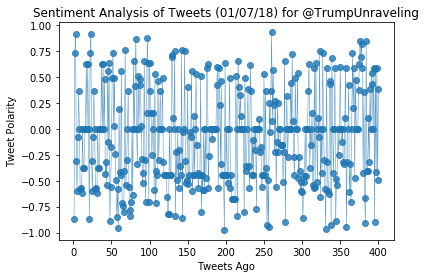

In [7]:
# Create plot
plt.plot(sentiments_pd["Tweets Ago"],
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()